Name: Yuk Fai Wong\
IFN619 Assessment 1B\
Question2:\
What do housing-market indicators say about the socio-economic conditions in different geographical locations, and how can they be used to provide forecasts of future economic conditions?

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import copy
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker

import swifter
import spacy
import multiprocess

import multiprocessing
cpu = int(multiprocessing.cpu_count()-1)#feel free to reduce it if you don't want to use all your CPU

plt.rcParams.update({'font.size': 22})##increase font size for all graph

In [2]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Question2:
## Question
This research is trying to address the following two questions:
1. How housing-market indicators indicate socio-economic conditions in different geographical locations
2. Whether the trend of housing market indicators can provide forecasts of future economic conditions

Solving these questions can give us information on how housing-market indicators can affect socio-economic. This information is critical to stabilising the nation socio-economic because it allows the country to develop steadily in the long term. On the other hand, unstable socio-economic could indicate a high-risk investment environment. It is important to investor and citizen since it represents their income and social stability.

key stakeholders: investor, citizen, government

## Data: 
Two types of data are required in this analysis:
- housing market indicators between U.S. geographic locations
- Economic indexes

1. housing market indicators between U.S. geographic locations.

We will analysis the Home Price Index of national and the top five cities with the most Gross Domestic Product. It will show whether their housing market indicators show any differences. The top five cities are retrieved from: https://apps.bea.gov/itable/drilldown.cfm?reqid=70&stepnum=40&Major_Area=5&State=5&Area=XX&TableId=533&Statistic=1&Year=2018&YearBegin=-1&Year_End=-1&Unit_Of_Measure=Levels&Rank=1&Drill=1&nRange=5

According to the government data, the top five popular cities with the most population totals are: New York(NY), Los Angeles city(CA), Chicago city(IL), San Francisco(CA) and Washington(DC) retrieved from https://fred.stlouisfed.org/


In [3]:
CSUSHPINSA = pd.read_csv('data/S&P Case-Shiller U.S. National Home Price Index.csv')

NYXRSA    = pd.read_csv('data/S&P Case-Shiller NY-New York Home Price Index.csv')
LXXRSA    = pd.read_csv('data/S&P Case-Shiller CA-Los Angeles Home Price Index.csv')
CHXRSA    = pd.read_csv('data/S&P Case-Shiller IL-Chicago Home Price Index.csv')
SFXRSA  = pd.read_csv('data/S&P Case-Shiller CA-San Francisco Home Price Index.csv')
WDXRSA = pd.read_csv('data/S&P Case-Shiller DC-Washington Home Price Index.csv')

HPI = [CSUSHPINSA, NYXRSA, LXXRSA, CHXRSA, SFXRSA, WDXRSA]
HPI_label = ['National', 'New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Washington']


2. Socio-economic indexes\
Socio-economic can be separated into the measurement of economic and social. We will use the following indexs:
    - Dow Jones Industrial Average(https://www.investing.com/indices/us-30)(company)
    - S&P 500 Index(https://www.investing.com/indices/us-spx-500)(company)
    - Nasdaq 100(https://www.investing.com/indices/nq-100)(company)
    - US Dollar Index(https://www.investing.com/indices/usdollar)(gvernment)
    - Real Gross Domestic Product(https://fred.stlouisfed.org/series/GDPC1)(gvernment)
    - Unemployment Rate(https://fred.stlouisfed.org/series/UNRATE))(citizen)
    - Personal Consumption Expenditures(https://fred.stlouisfed.org/series/PCE)(citizen)

Those data describe the performance of companies, government and citizens, which should be enough to recapitulate socio-economic. 

In [4]:
DJIA = pd.read_csv('data/Dow Jones Industrial Average.csv')
SP500 = pd.read_csv('data/S&P 500.csv')
NASDAQ = pd.read_csv('data/NASDAQ100.csv')
USDI = pd.read_csv('data/US Dollar Index Historical Data.csv')
GDP = pd.read_csv('data/Real Gross Domestic Product.csv')
UR = pd.read_csv('data/Unemployment Rate.csv')
PCE = pd.read_csv('data/Personal Consumption Expenditures.csv')
EI = [DJIA, SP500, NASDAQ, GDP, USDI, PCE, UR]
EI_label = ['Dow Jones Industrial Average', 'S&P 500 Index', 'Nasdaq 100',
            'US Dollar Index', 'Real Gross Domestic Product', 
            'Unemployment Rate', 'Personal Consumption Expenditures']

### Home Price Index cleaning

In [5]:
def show_info(pd_dataset):
    for d in pd_dataset:
        print('{0} :{1}, {2}, {3}'.format(type(d[d.columns[0]][0]), d[d.columns[0]][0], d[d.columns[0]][1], d[d.columns[0]][2]))#print the type of DATE column
    print('-----------------------')
    for d in pd_dataset:
        print('{0} :{1}'.format(type(d[d.columns[1]][0]), d[d.columns[1]][0]))#print the type of DATE column

In [6]:
for d in HPI:
    print(d.columns)

Index(['DATE', 'CSUSHPINSA'], dtype='object')
Index(['DATE', 'NYXRSA'], dtype='object')
Index(['DATE', 'LXXRSA'], dtype='object')
Index(['DATE', 'CHXRSA'], dtype='object')
Index(['DATE', 'SFXRSA'], dtype='object')
Index(['DATE', 'WDXRSA'], dtype='object')


In [7]:
show_info(HPI)

<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
-----------------------
<class 'numpy.float64'> :100.0
<class 'numpy.float64'> :100.33923104670299
<class 'numpy.float64'> :101.031209328988
<class 'numpy.float64'> :100.564839600522
<class 'numpy.float64'> :101.449953880758
<class 'numpy.float64'> :100.871832649399


String class is hard to compare and draw graph. Therefore it will be parse into python datetime class.

The date interval of all data sets is unified into months, so there is no need to clean up.

In [8]:
for d in HPI:
    d['DATE'] = d['DATE'].swifter.progress_bar(False).apply(lambda x: np.datetime64(datetime.datetime.strptime(x,'%Y-%m-%d')))

check parsed correctly

In [9]:
show_info(HPI)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
-----------------------
<class 'numpy.float64'> :100.0
<class 'numpy.float64'> :100.33923104670299
<class 'numpy.float64'> :101.031209328988
<class 'numpy.float64'> :100.564839600522
<class 'numpy.float64'> :101.449953880758
<class 'numpy.float64'> :100.871832649399


### Economic indexes cleaning

In [10]:
for d in EI:
    print(d.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['DATE', 'GDPC1'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['DATE', 'PCE'], dtype='object')
Index(['DATE', 'UNRATE'], dtype='object')


In [11]:
show_info(EI)

<class 'str'> :Jan 20, Dec 19, Nov 19
<class 'str'> :Jan 20, Dec 19, Nov 19
<class 'str'> :Jan 20, Dec 19, Nov 19
<class 'str'> :2000-01-01, 2000-04-01, 2000-07-01
<class 'str'> :Jan 20, Dec 19, Nov 19
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
<class 'str'> :2000-01-01, 2000-02-01, 2000-03-01
-----------------------
<class 'str'> :28,256.03
<class 'str'> :3,225.52
<class 'str'> :8,991.51
<class 'numpy.float64'> :12924.178999999998
<class 'numpy.float64'> :97.39
<class 'numpy.float64'> :6535.3
<class 'numpy.float64'> :4.0


1. String class is hard to compare and draw graph. Therefore it will be parse into python datetime class.
2. some dataset is in reverse order, required to unify into ascending order
3. some data is in str format, required to unify into numpy.float64

**parse date**

In [12]:
datetime.datetime.strptime(EI[0][EI[0].columns[0]][0],'%b %y').date()#test to parse 'Jan 20'

datetime.date(2020, 1, 1)

In [13]:
def date_parser(s):
    try:
        return np.datetime64(datetime.datetime.strptime(s,'%Y-%m-%d'))
    except(ValueError):
        return np.datetime64(datetime.datetime.strptime(s,'%b %y').date())

In [14]:
for d in EI:
    d[d.columns[0]] = d[d.columns[0]].swifter.progress_bar(False).apply(date_parser)

check date is correct parsed

In [15]:
show_info(EI)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-04-01 00:00:00, 2000-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
-----------------------
<class 'str'> :28,256.03
<class 'str'> :3,225.52
<class 'str'> :8,991.51
<class 'numpy.float64'> :12924.178999999998
<class 'numpy.float64'> :97.39
<class 'numpy.float64'> :6535.

**sort all dataset to ascending order by date**

In [16]:
#before
show_info(EI)

for i in range(len(EI)):
    EI[i] = EI[i].sort_values(EI[i].columns[0]).reset_index(drop=True)
print('-------------------------------------------')
#after
show_info(EI)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-04-01 00:00:00, 2000-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2020-01-01 00:00:00, 2019-12-01 00:00:00, 2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
-----------------------
<class 'str'> :28,256.03
<class 'str'> :3,225.52
<class 'str'> :8,991.51
<class 'numpy.float64'> :12924.178999999998
<class 'numpy.float64'> :97.39
<class 'numpy.float64'> :6535.

**Parse data(second column) from str to np.float**

In [17]:
for d in EI:
    d[d.columns[1]] = d[d.columns[1]].swifter.progress_bar(False).apply(lambda x: np.float(x.replace(',','')) if(type(x) == str) else x)

check result correct

In [18]:
show_info(EI)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-04-01 00:00:00, 2000-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> :2000-01-01 00:00:00, 2000-02-01 00:00:00, 2000-03-01 00:00:00
-----------------------
<class 'numpy.float64'> :10940.53
<class 'numpy.float64'> :1394.46
<class 'numpy.float64'> :3570.05
<class 'numpy.float64'> :12924.178999999998
<class 'numpy.float64'> :105.13
<c

## Analysis

To address the first question, it is necessary to measure the differences in housing-market indicators between different geographical locations.

Interest: Differences in housing market index in different U.S. geographic locations

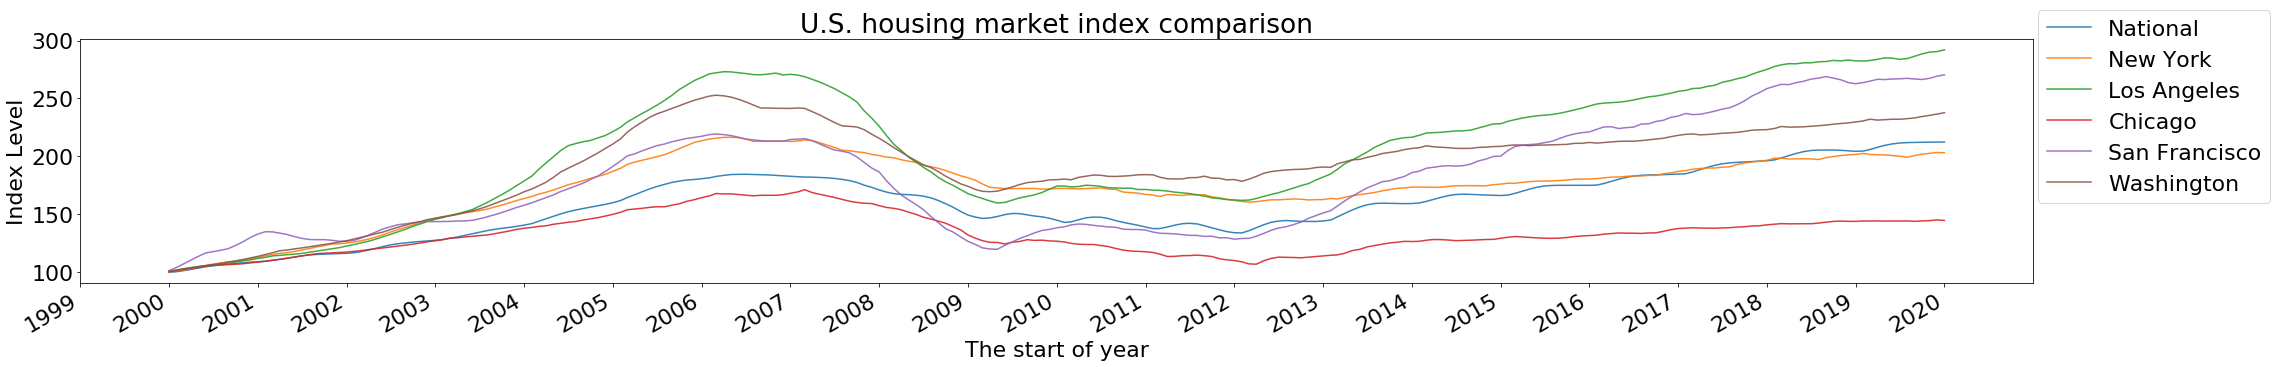

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(35, 5), facecolor='w', edgecolor='k')
for i in range(len(HPI)):
    ax.plot(HPI[i]['DATE'], HPI[i][HPI[i].columns[1]], label=HPI_label[i], alpha = 0.9)

ax.set_xlabel("The start of year")
ax.set_ylabel("Index Level")
ax.set_title("U.S. housing market index comparison")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
fig.autofmt_xdate()
fig.legend()
plt.show()

The only difference is the crest and trough of the index level. 
The housing market index for Chicago seems to be the gentlest, while Los Angeles show violent fluctuation. 
This phenomenon indicated that the housing market index have no different in term of tends with different geographic locations in US. 
To further provide this theory, check the following gradient graph: 

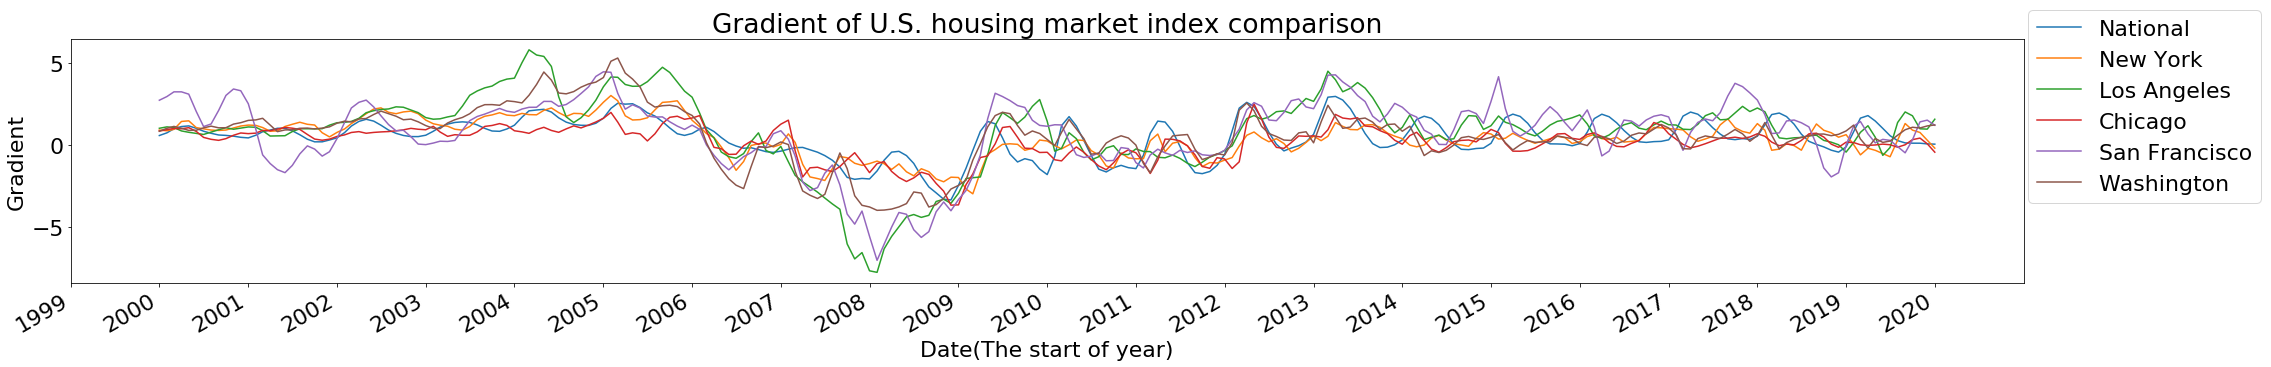

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(35, 5), facecolor='w', edgecolor='k')
# ax2 = ax.twinx()
for i in range(len(HPI)):
    y = np.gradient(HPI[i][HPI[i].columns[1]])
    ax.plot(HPI[i]['DATE'], y, label=HPI_label[i], alpha = 1)
#     ax2.plot(HPI[i]['DATE'], HPI[i][HPI[i].columns[1]], label=HPI_label[i], alpha = 0.9)

ax.set_xlabel("Date(The start of year)")
ax.set_ylabel("Gradient")
ax.set_title("Gradient of U.S. housing market index comparison")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
fig.autofmt_xdate()
fig.legend()
plt.show()

The graph shows how steeply the housing market index has changed. All these lines overlap most of the time, which indicates that their trends are basically consistent. However, their steepness varies, for example, Los Angeles shows a very steep increment in 2004 and a steep decrease in 2007. 

This phenomenon showed that the trends of U.S. housing market index will indicate the same thing as they both sharing the same trends. Therefore, we can use the National housing market index as the summary of all the housing market index across different regions. In this way, the comparison between housing market index and socio-economic index is much easier.

The following part will use National housing market index to compare with socio-economic which will answer both question.

Interest: Similary partten between housing market index and economic index.   

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(35, 10), facecolor='w', edgecolor='k')

ax[0].plot(HPI[0]['DATE'], HPI[0][HPI[0].columns[1]], alpha = 0.7, color = 'r')

ax[0].set_xlabel("Date(The start of year)")
ax[0].set_ylabel("index", color = 'r')
ax[0].set_title(HPI_label[0] + " housing market index")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))


y1 = np.gradient(HPI[0][HPI[0].columns[1]])
ax[1].plot(HPI[0]['DATE'], y1, color = 'r', label = HPI_label[0], alpha = 0.7)

ax[1].set_xlabel("Date(The start of year)")
ax[1].set_ylabel("Gradient", color = 'r')
ax[1].set_title("Gradient graph of National housing market index".format(EI_label[i]))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

ax[1].axhline(y = 0, color = 'k')

fig.autofmt_xdate()
plt.show()

The graph on the top showed the comparison between economic index and national home price index and its gradient graph on the right. For the gradient data(line) that is above 0 indicate that the actual data tend to increase and opposite for below 0. Therefore, large-scope of data above the zero line means the data is rising, for example, the national housing market index 2000-2006.

From the gradient graph, we can divide the National housing market index into four part:
1. 2000-01-01~2006-06-01: increase stage
2. 2006-01-01~2009-03-01: decrease stage
3. 2009-03-01~2012-01-01: recover stage
4. 2012-01-01~2020-01-01: increase stage

In [22]:
turing = [np.datetime64('2006-06-01'), np.datetime64('2009-03-01'), np.datetime64('2012-01-01')]
time = HPI[0][HPI[0].columns[0]]
gradient = np.gradient(HPI[0][HPI[0].columns[1]])
period = [(turing[0]>time), ((turing[0]<=time) & (turing[1]>time)),
         ((turing[1]<=time) & (turing[2]>time)), (turing[2]<=time)]

for p in range(len(period)):
    print('Sum of gradient, Dividion{0}: {1}'.format(p, np.sum(gradient[period[p]])))

Sum of gradient, Dividion0: 84.75150000000001
Sum of gradient, Dividion1: -37.392499999999984
Sum of gradient, Dividion2: -12.410000000000025
Sum of gradient, Dividion3: 77.79199999999999


In [23]:
fig, ax = plt.subplots(2, 1, figsize=(35, 10), facecolor='w', edgecolor='k')

ax[0].plot(HPI[0]['DATE'], HPI[0][HPI[0].columns[1]], alpha = 0.7, color = 'r')
for t in turing: ax[0].axvline(x = t, color = 'g', ls = '-') 

ax[0].set_xlabel("Date(The start of year)")
ax[0].set_ylabel("index", color = 'r')
ax[0].set_title(HPI_label[0] + " housing market index")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

y1 = np.gradient(HPI[0][HPI[0].columns[1]])
ax[1].plot(HPI[0]['DATE'], y1, color = 'r', label = HPI_label[0], alpha = 0.7)
for t in turing: ax[1].axvline(x = t, color = 'g', ls = '-') 

ax[1].set_xlabel("Date(The start of year)")
ax[1].set_ylabel("Gradient", color = 'r')
ax[1].set_title("Gradient graph of National housing market index".format(EI_label[i]))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

ax[1].axhline(y = 0, color = 'k')

fig.autofmt_xdate()
plt.show()

So, we can use this dividon to match the tends of the economic indicator

In [24]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

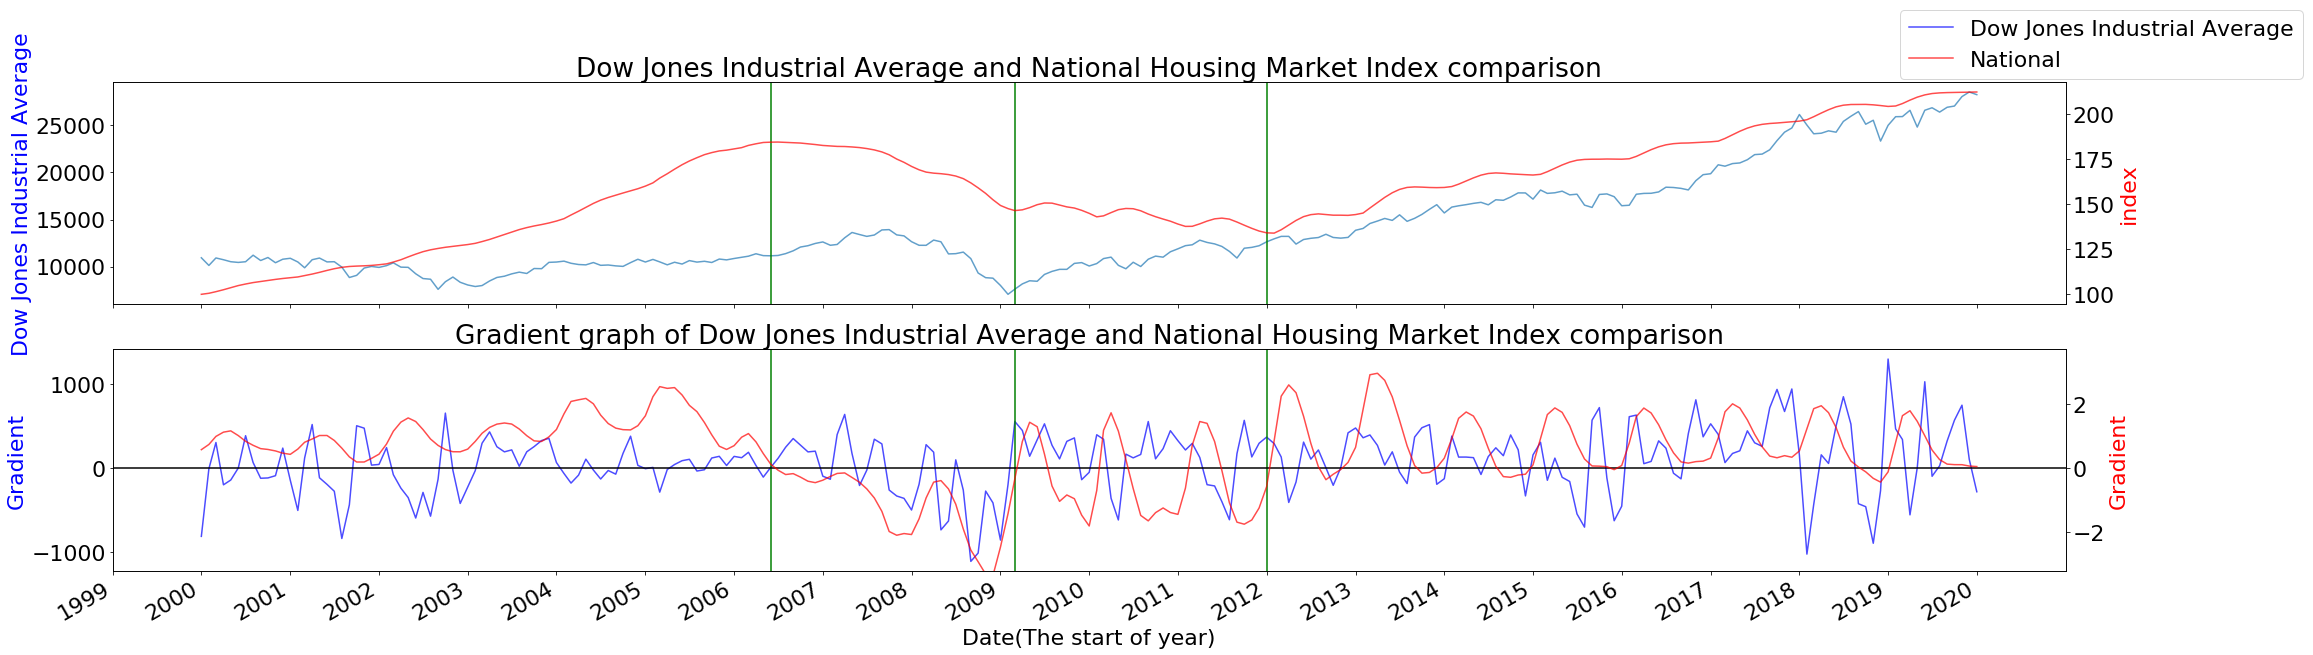

Sum of gradient, Dividion0:  National hoursing price index: 84.75   Dow Jones Industrial Average: -187.38
Sum of gradient, Dividion1:  National hoursing price index: -37.39   Dow Jones Industrial Average: -3823.34
Sum of gradient, Dividion2:  National hoursing price index: -12.41   Dow Jones Industrial Average: 5089.31
Sum of gradient, Dividion3:  National hoursing price index: 77.79   Dow Jones Industrial Average: 15689.59


Sum of gradient, Dividion0:  National hoursing price index: 84.75   S&P 500 Index: -138.34
Sum of gradient, Dividion1:  National hoursing price index: -37.39   S&P 500 Index: -503.66
Sum of gradient, Dividion2:  National hoursing price index: -12.41   S&P 500 Index: 518.52
Sum of gradient, Dividion3:  National hoursing price index: 77.79   S&P 500 Index: 1937.88


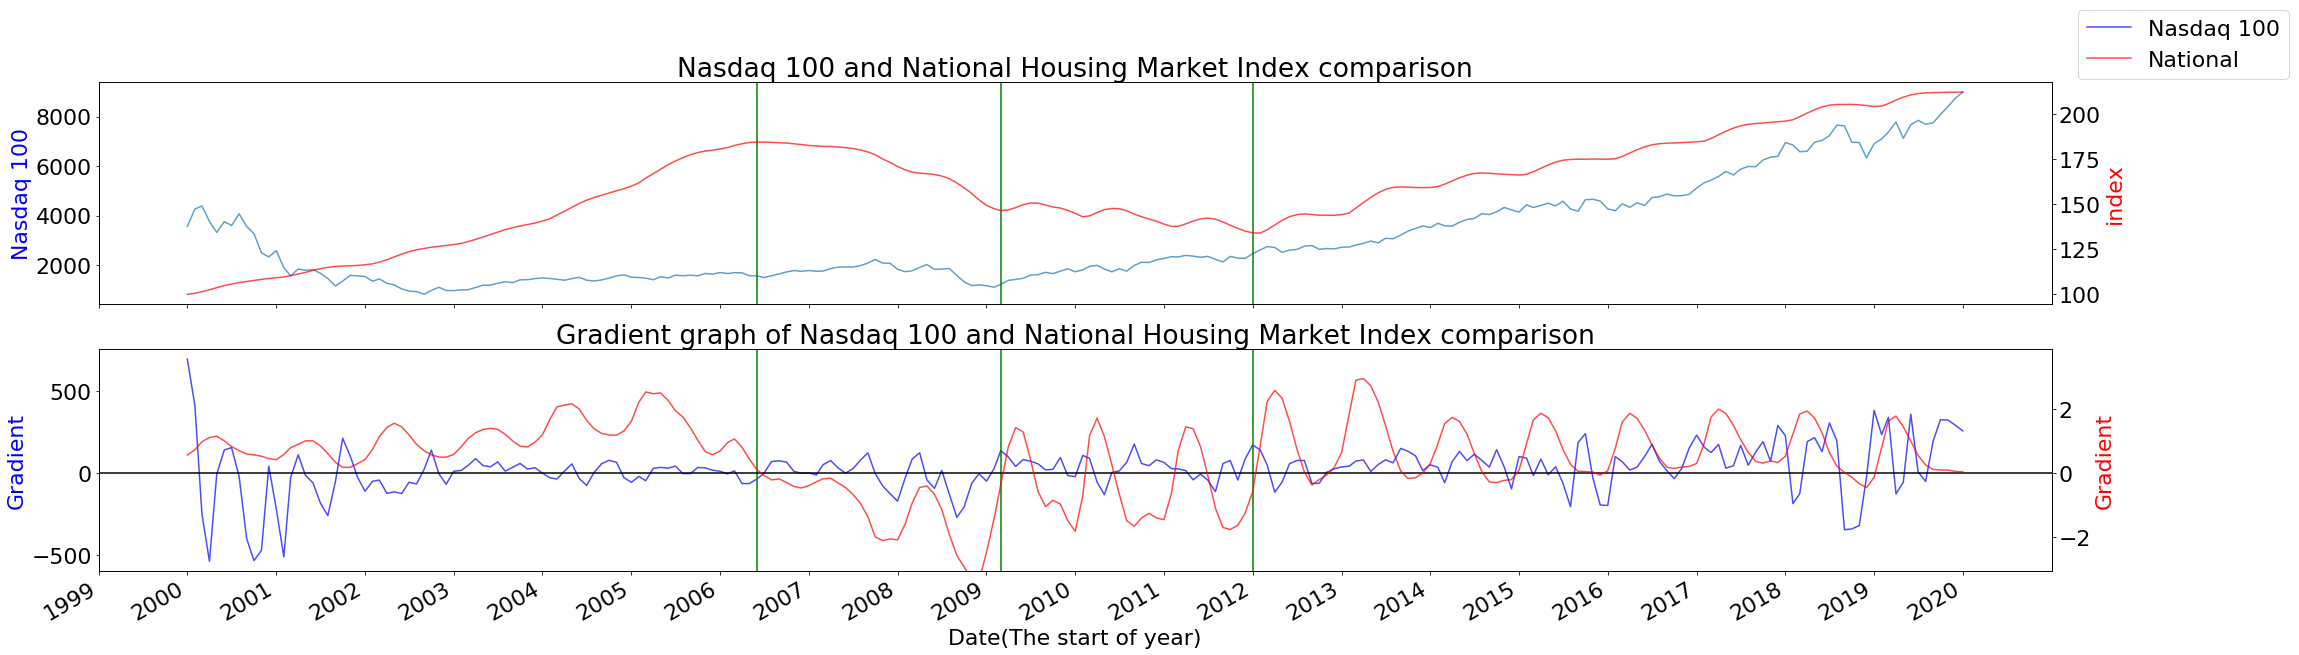

Sum of gradient, Dividion0:  National hoursing price index: 84.75   Nasdaq 100: -1644.20
Sum of gradient, Dividion1:  National hoursing price index: -37.39   Nasdaq 100: -400.40
Sum of gradient, Dividion2:  National hoursing price index: -12.41   Nasdaq 100: 1195.89
Sum of gradient, Dividion3:  National hoursing price index: 77.79   Nasdaq 100: 6747.84


Sum of gradient, Dividion0:  National hoursing price index: 84.75   US Dollar Index: 2508.69
Sum of gradient, Dividion1:  National hoursing price index: -37.39   US Dollar Index: -169.51
Sum of gradient, Dividion2:  National hoursing price index: -12.41   US Dollar Index: 921.73
Sum of gradient, Dividion3:  National hoursing price index: 77.79   US Dollar Index: 3205.64


Sum of gradient, Dividion0:  National hoursing price index: 84.75   Real Gross Domestic Product: -19.76
Sum of gradient, Dividion1:  National hoursing price index: -37.39   Real Gross Domestic Product: 1.87
Sum of gradient, Dividion2:  National hoursing price index: -12.41   Real Gross Domestic Product: -7.10
Sum of gradient, Dividion3:  National hoursing price index: 77.79   Real Gross Domestic Product: 18.15


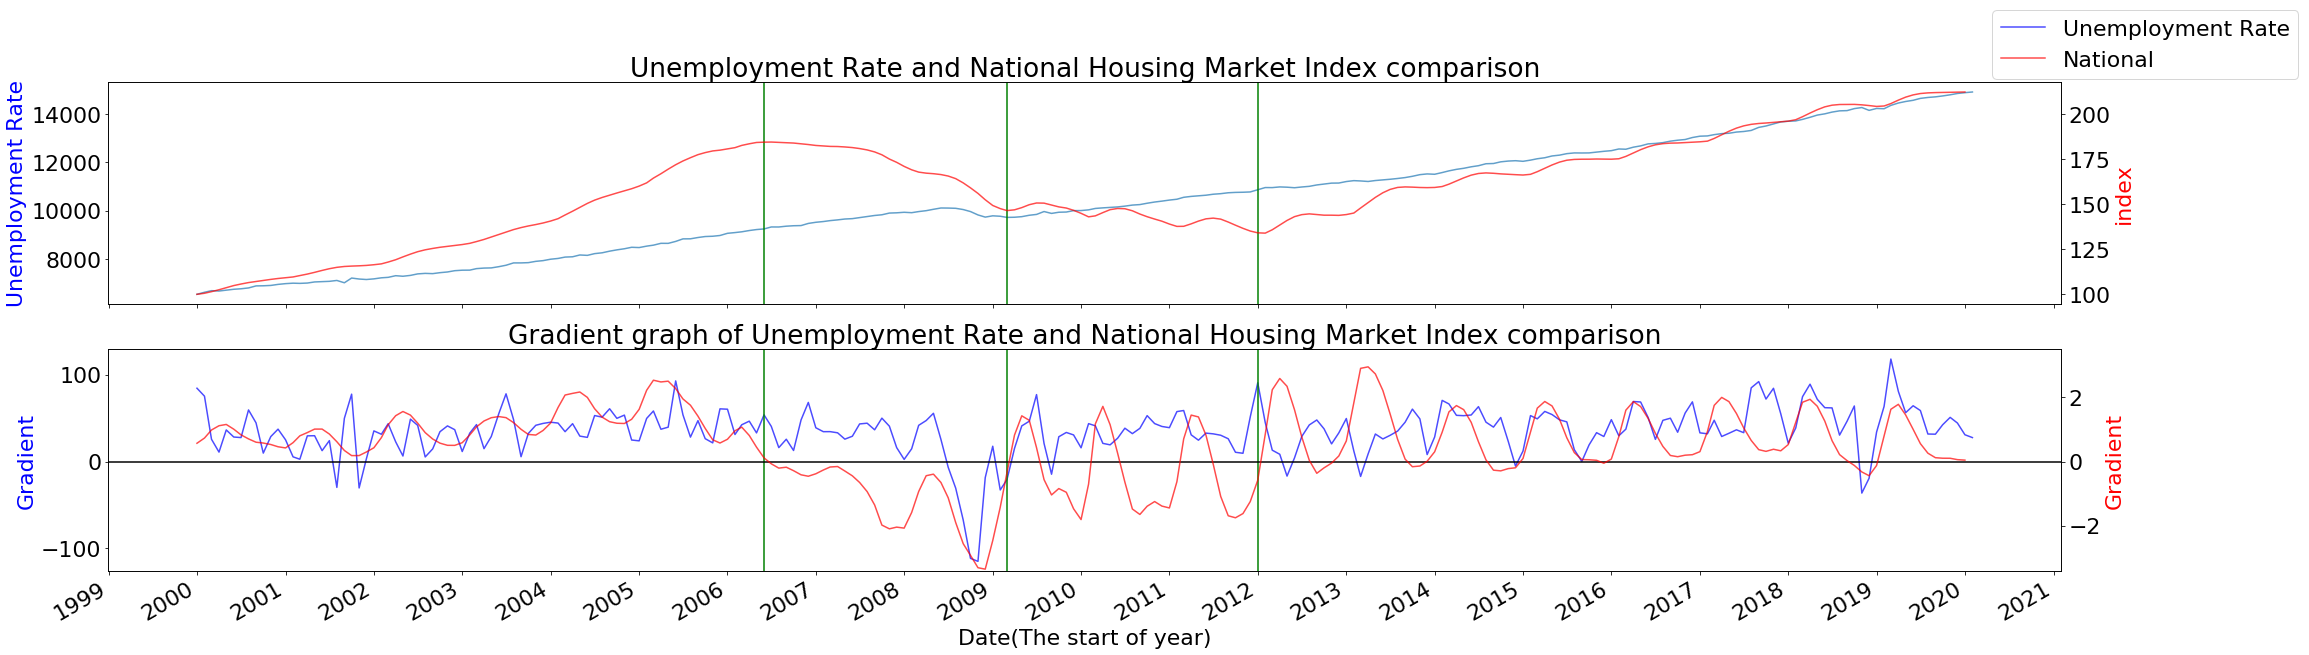

Sum of gradient, Dividion0:  National hoursing price index: 84.75   Unemployment Rate: 2734.85
Sum of gradient, Dividion1:  National hoursing price index: -37.39   Unemployment Rate: 514.30
Sum of gradient, Dividion2:  National hoursing price index: -12.41   Unemployment Rate: 1074.90
Sum of gradient, Dividion3:  National hoursing price index: 77.79   Unemployment Rate: 4105.45


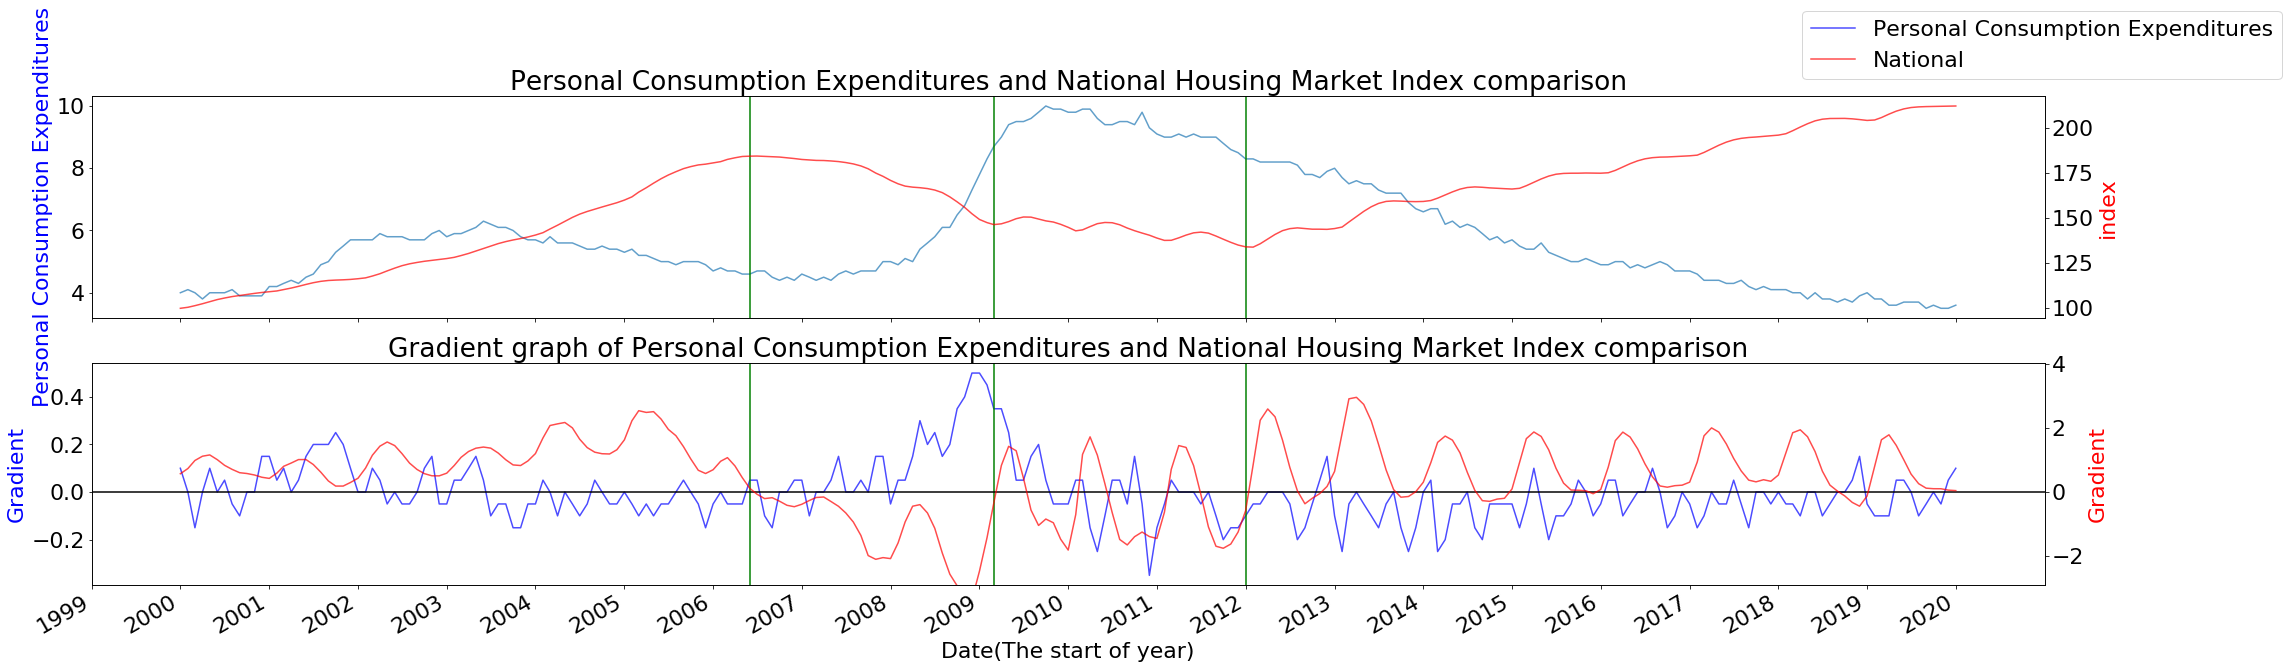

Sum of gradient, Dividion0:  National hoursing price index: 84.75   Personal Consumption Expenditures: 0.65
Sum of gradient, Dividion1:  National hoursing price index: -37.39   Personal Consumption Expenditures: 3.90
Sum of gradient, Dividion2:  National hoursing price index: -12.41   Personal Consumption Expenditures: -0.10
Sum of gradient, Dividion3:  National hoursing price index: 77.79   Personal Consumption Expenditures: -4.75


In [25]:
for i in range(len(EI)):
    fig, ax = plt.subplots(2, 1, figsize=(35, 10), facecolor='w', edgecolor='k')
    ax[0].plot(EI[i][EI[i].columns[0]], EI[i][EI[i].columns[1]], label=EI_label[i], alpha = 0.7)
    for t in turing: ax[0].axvline(x = t, color = 'g', ls = '-') 
    
    ax2 = ax[0].twinx()
    ax2.plot(HPI[0]['DATE'], HPI[0][HPI[0].columns[1]], label=HPI_label[0], alpha = 0.7, color = 'r')
    
    
    ax[0].set_xlabel("Date(The start of year)")
    ax[0].set_ylabel(EI_label[i], color = 'b')
    ax2.set_ylabel("index", color = 'r')
    ax[0].set_title("{0} and {1} Housing Market Index comparison".format(EI_label[i],HPI_label[0]))
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[0].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

    
    y = np.gradient(EI[i][EI[i].columns[1]])
    ax[1].plot(EI[i][EI[i].columns[0]], y, color = 'b', label = EI_label[i], alpha = 0.7)
    for t in turing: ax[1].axvline(x = t, color = 'g', ls = '-') 
    
    axr2 = ax[1].twinx()
    y1 = np.gradient(HPI[0][HPI[0].columns[1]])
    axr2.plot(HPI[0]['DATE'], y1, color = 'r', label = HPI_label[0], alpha = 0.7)
    
    ax[1].set_xlabel("Date(The start of year)")
    ax[1].set_ylabel("Gradient", color = 'b')
    axr2.set_ylabel("Gradient", color = 'r')
    ax[1].set_title("Gradient graph of {0} and National Housing Market Index comparison".format(EI_label[i]))
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[1].xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

    ax[1].axhline(y = 0, color = 'k')
    
    align_yaxis(ax[1], 0, axr2, 0)
    
    handles, labels = ax[0].get_legend_handles_labels()
    handles2, labels2 = ax[1].get_legend_handles_labels()
    handles3, labels3 = ax2.get_legend_handles_labels()
    handles4, labels4 = axr2.get_legend_handles_labels()
    handles = handles+handles2+handles3+handles4
    labels = labels+labels2+labels3+labels4
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys())

    fig.autofmt_xdate()
    plt.show()
    for p in range(len(period)):
        print('Sum of gradient, Dividion{0}:  '.format(p), end = '')
        time1 = EI[i][EI[i].columns[0]]
        periody = [(turing[0]>time1), ((turing[0]<=time1) & (turing[1]>time1)),
         ((turing[1]<=time1) & (turing[2]>time1)), (turing[2]<=time1)]
        print('National hoursing price index: {0:2.2f}   {1}: {2:3.2f}'.format(np.sum(gradient[period[p]]), EI_label[i], np.sum(y[periody[p]])))

**For economic:**\
For the Dow Jones Industrial Average(DJIA), the first period is peaceful but did not react on the rise of the national housing price index(NHPX). The time of DJIA to start falling is behind the NHPX. The NHPX seems to provide prior knowledge in the downtrend. However, it can recover quickly, which is different from NHPX.

S&P500 graph is very similar to DJIA. The rise of NHPX has no response in S&P500 in the first period, but provide prior knowledge of downtrend in the second period. Similarly, both DJIA and S&P500 do not have a recovery period which quickly recovers after the drop in 2009. Then they all rose steadily in the fourth period.

Nasdaq100 fell from 2000 to 2002, and NHPX failed to respond to this. However, we can notice that Nasdaq100 has a little dropped in 2008 which seems to be the effect of NHPX. Same as the other two US stock index, it can quickly recover and stably increase.

The downtrend of the US Dollar Index(USDI) in the first period is the opposite of NHPX. However, when the NHPX drop, USDI decrease further simultaneously. Furthermore, USDI recovered on middle 2008 which is faster than any index that previously mentioned. Although, it then rises overall, but very unstable. There should be a lot of factors affecting USDI.

**For social:**\
For Real Gross Domestic Product(RGDP), the first period similarly grew. The NHPX again successfully provide prior knowledge on the downtrend around middle 2008 to 2009. RGDP also showed it needs some time to recover, but not as long as NHPX. The steady rise in the fourth stage seems to have been the norm.

Unemployment rate(UR) shows the opposite of NHPX. Although NHPX cannot be used for explanation of the NHPX increment in 2001-2004, the rest of the first period pretty matches. The NHPX also provide prior knowledge for the increment of UR in 2008-2010. UR can recovers fast which similar with other economic indexes.

Personal Consumption Expenditures is very similar to GDP. grow in first as usual and decline when NHPX show a downward trend. Likewise, it has a short period of recovery time and stably rises afterwards.

## Insight

Question: How housing-market indicators indicate socio-economic conditions in different geographical locations

The NHPX can specify the market risk to a certain extent. This research has shown that if most NHPX with different geographical locations shown a long-tern downtrend, could allude a crisis in both economic and social. The 2008 recession in Dow Jones Industrial Average, S&P500, Nasdaq100, RGDP, Unemployment rate and Personal Consumption Expenditures both proved this phenomenon.


Question: Whether the trend of housing market indicators can provide forecasts of future economic conditions

NHPX plays one of the roles of social crisis in this dataset because it alluded the occurrence of the subprime mortgage crisis in 2008. If enough attention is given to NHPX, this kind of crisis can be avoided, because the downward trend of NHPX is earlier than the time when the crisis actually occurred. However, the source of these crises is not single. Many reasons can cause the social or economic crisis,  For example, U.S.-China trade war, COVID-19 outbreak. Therefore, NHPX can be one of the indicators to provide forecasts of future economic conditions, but not the only one.

To sum up, the U.S. housing market index could be in the indicator of socioeconomic status. Since the U.S. housing market index provides the prior knowledge in the potential threat of U.S. socio-economic, U.S. government should pay attention to such indicator to maintain long-term stability in both social and economic.